In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [2]:
tqdm.pandas()


# NCATS CYP2C9
Dataset from https://opendata.ncats.nih.gov/adme/data

https://pubchem.ncbi.nlm.nih.gov/bioassay/1645842

## Assay info

Chemical compounds were tested for their effect on CYP enzyme activities by using P450-Glo (TM) screening systems (Promega Corporation, Madison, WI). These systems provide a luminescent method containing proluciferin substrates and are converted to luciferin products by CYP isozymes. The luciferin products formed are detected with a luciferin detection reagent, and the amount of light produced is proportional to CYP activity. P450-Glo (TM) CYP screening system (Catalog. No. V9890) was used to detect the compounds that interfere in CYP activity. The positive control compound used for CYP assay is quinidine (Sigma-Aldrich, St. Louis, MO).


PUBCHEM_ACTIVITY_OUTCOME: Corresponds to PUBCHEM_ACTIVITY_SCORE. For all inactive compounds, PUBCHEM_ACTIVITY_SCORE is 0. For all active compounds, a score range was given for each curve class type given above. Active antagonist compounds have PUBCHEM_ACTIVITY_SCORE between 40 and 100. 

PUBCHEM_ACTIVITY_SCORE: Average of 5 experimental replicates. Fit_LogAC50 was used for determining relative score and was scaled to each curve class' score range.


In [3]:
df = pd.read_csv("NCATS_CYP_raw/AID_1645842_datatable_all.csv")

/tmp/ipykernel_184382/426259993.py:1: DtypeWarning: Columns (0,9,10,11,12,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NCATS_CYP_raw/AID_1645842_datatable_all.csv")


In [4]:
df["PUBCHEM_EXT_DATASOURCE_SMILES"]

0                                                     NaN
1                                                     NaN
2                                                     NaN
3                                                     NaN
4                                                     NaN
                              ...                        
5242    C=CCN1CCC23[C@@H]4C(=O)CC[C@]2(C1CC5=C3C(=C(C=...
5243                           CCCNC(C)C(=O)NC1=CC=CC=C1C
5244               CCN(CC1=CC=NC=C1)C(=O)C(CO)C2=CC=CC=C2
5245                     C[N+](C)(C)CCCCCCCCCC[N+](C)(C)C
5246      C1=CC=C(C=C1)CN=C(N)NC(=O)C2=C(N=C(C(=N2)Cl)N)N
Name: PUBCHEM_EXT_DATASOURCE_SMILES, Length: 5247, dtype: object

In [5]:
list(df.columns)

['PUBCHEM_RESULT_TAG',
 'PUBCHEM_SID',
 'PUBCHEM_CID',
 'PUBCHEM_EXT_DATASOURCE_SMILES',
 'PUBCHEM_ACTIVITY_OUTCOME',
 'PUBCHEM_ACTIVITY_SCORE',
 'PUBCHEM_ACTIVITY_URL',
 'PUBCHEM_ASSAYDATA_COMMENT',
 'Phenotype-Replicate_1',
 'Potency-Replicate_1',
 'Efficacy-Replicate_1',
 'Analysis Comment-Replicate_1',
 'Activity_Score-Replicate_1',
 'Curve_Description-Replicate_1',
 'Fit_LogAC50-Replicate_1',
 'Fit_HillSlope-Replicate_1',
 'Fit_R2-Replicate_1',
 'Fit_InfiniteActivity-Replicate_1',
 'Fit_ZeroActivity-Replicate_1',
 'Fit_CurveClass-Replicate_1',
 'Excluded_Points-Replicate_1',
 'Max_Response-Replicate_1',
 'Activity at 0.0000073560 uM-Replicate_1',
 'Activity at 0.0000367800 uM-Replicate_1',
 'Activity at 0.0000735600 uM-Replicate_1',
 'Activity at 0.0001677464 uM-Replicate_1',
 'Activity at 0.0003678000 uM-Replicate_1',
 'Activity at 0.0007362988 uM-Replicate_1',
 'Activity at 0.00153 uM-Replicate_1',
 'Activity at 0.00368 uM-Replicate_1',
 'Activity at 0.00723 uM-Replicate_1',
 'A

In [6]:
# first 5 rows are metadata 
df[0:5]

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype-Replicate_1,Potency-Replicate_1,...,Activity at 0.910 uM-Replicate_5,Activity at 1.182 uM-Replicate_5,Activity at 2.302 uM-Replicate_5,Activity at 4.834 uM-Replicate_5,Activity at 11.49 uM-Replicate_5,Activity at 23.94 uM-Replicate_5,Activity at 57.45 uM-Replicate_5,Activity at 115.4 uM-Replicate_5,Activity at 193.5 uM-Replicate_5,Activity at 288.3 uM-Replicate_5
0,RESULT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STRING,FLOAT,...,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT
1,RESULT_DESCR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indicates type of activity observed: inhibitor...,Concentration at which compound exhibits half-...,...,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.
2,RESULT_UNIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MICROMOLAR,...,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT
3,RESULT_IS_ACTIVE_CONCENTRATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RESULT_ATTR_CONC_MICROMOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.909733,1.18163,2.3015,4.83399,11.4937,23.9433,57.447,115.368,193.451,288.3


In [7]:
    df = df.drop(labels=list(range(0, 5)), axis=0).reset_index(
        drop=True
    )

In [8]:
df.head()

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype-Replicate_1,Potency-Replicate_1,...,Activity at 0.910 uM-Replicate_5,Activity at 1.182 uM-Replicate_5,Activity at 2.302 uM-Replicate_5,Activity at 4.834 uM-Replicate_5,Activity at 11.49 uM-Replicate_5,Activity at 23.94 uM-Replicate_5,Activity at 57.45 uM-Replicate_5,Activity at 115.4 uM-Replicate_5,Activity at 193.5 uM-Replicate_5,Activity at 288.3 uM-Replicate_5
0,1,104223880.0,197033.0,CC1=CC2=C(C=C1)N(C3=C2CN(CC3)C)CCC4=CN=C(C=C4)C,Active,41.0,http://assay.nih.gov/htsws/rest/display/p450-i...,NaN,Inhibitor,10.684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,11111456.0,5281670.0,C1=CC(=C(C=C1O)O)C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O,Inconclusive,10.0,http://assay.nih.gov/htsws/rest/display/p450-i...,NaN,Inhibitor,23.9185,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,11113977.0,6604832.0,C[C@H]1[C@@H](C(=O)N[C@H](C(=O)N2CCC[C@@H]2C(=...,Inconclusive,10.0,http://assay.nih.gov/htsws/rest/display/p450-i...,NaN,Inhibitor,7.5637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,124879150.0,5280443.0,C1=CC(=CC=C1C2=CC(=O)C3=C(C=C(C=C3O2)O)O)O,Active,41.0,http://assay.nih.gov/htsws/rest/display/p450-i...,NaN,Inhibitor,21.3174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,124879975.0,836.0,C1=CC(=C(C=C1CC(C(=O)O)N)O)O,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/p450-i...,NaN,Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Phenotype-Replicate_1', ylabel='count'>

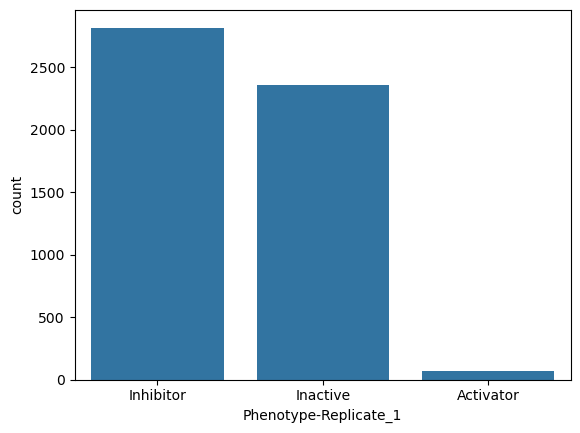

In [9]:
sns.countplot(data=df, x="Phenotype-Replicate_1")

<Axes: xlabel='PUBCHEM_ACTIVITY_SCORE', ylabel='Count'>

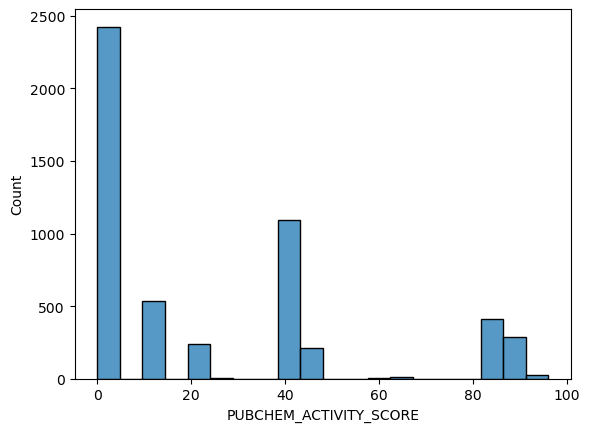

In [10]:
sns.histplot(data=df, x="PUBCHEM_ACTIVITY_SCORE")

<Axes: xlabel='PUBCHEM_ACTIVITY_OUTCOME', ylabel='Count'>

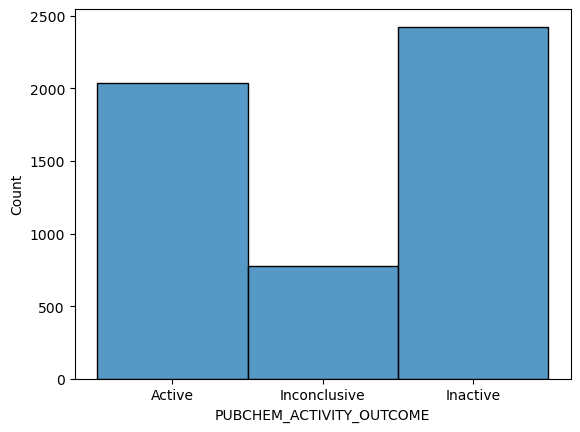

In [11]:
sns.histplot(data=df, x="PUBCHEM_ACTIVITY_OUTCOME")


In [12]:
import matplotlib.pyplot as plt

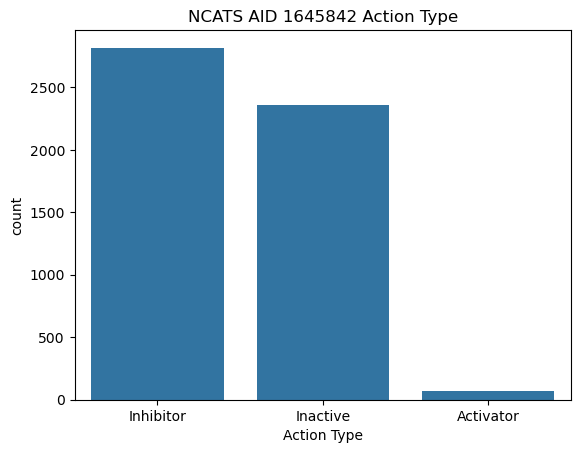

In [13]:
plt.title("NCATS AID 1645842 Action Type")
sns.countplot(data=df, x="Phenotype-Replicate_1")
plt.xlabel("Action Type")
plt.savefig("NCATS_AID_1645842.png")

In [14]:
# clean up the main_dataset

In [15]:
activity_cols = ["PUBCHEM_ACTIVITY_OUTCOME", "PUBCHEM_ACTIVITY_SCORE"]

In [16]:
mol_col = "PUBCHEM_EXT_DATASOURCE_SMILES"
mol_id_cols = ["PUBCHEM_SID", "PUBCHEM_CID"]

In [17]:
# standardisation of SMILES
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.rdBase import BlockLogs
import mols2grid

In [18]:

# from Pat Walters method
def standardize_smiles(smiles):
    try:
        # follows the steps in
        # https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
        # as described **excellently** (by Greg) in
        # https://www.youtube.com/watch?v=eWTApNX8dJQ
        mol = Chem.MolFromSmiles(smiles)
    
        # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
        clean_mol = rdMolStandardize.Cleanup(mol)
    
        # if many fragments, get the "parent" (the actual mol we are interested in) 
        parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
    
        # try to neutralize molecule
        uncharger = rdMolStandardize.Uncharger()  # annoying, but necessary as no convenience method exists
        uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
    
        # note that no attempt is made at reionization at this step
        # nor at ionization at some pH (rdkit has no pKa caculator)
        # the main aim to represent all molecules from different sources
        # in a (single) standard way, for use in ML, catalogue, etc.
    
        te = rdMolStandardize.TautomerEnumerator()  # idem
        taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)
    
        return Chem.MolToSmiles(taut_uncharged_parent_clean_mol)
    except:
        return pd.NA

In [ ]:

with BlockLogs():
    df["CANONICAL_SMILES"] = df["PUBCHEM_EXT_DATASOURCE_SMILES"].progress_apply(lambda x: standardize_smiles(x))

  7%|█████████▉                                                                                                                                      | 364/5242 [00:04<00:22, 213.00it/s]

In [ ]:
def smi_to_inchikey(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return Chem.MolToInchiKey(mol)
    except:
        return pd.NA

In [ ]:
# compute inchikeys
with BlockLogs():
    df["INCHIKEY"] = df["CANONICAL_SMILES"].progress_apply(lambda x: smi_to_inchikey(x))

In [ ]:
df.INCHIKEY.isna().sum() # there are a few that couldn't be standardised

In [ ]:
df.dropna(subset="INCHIKEY")

In [ ]:
# lets gather up the activities?

In [ ]:
activity_cols = [f"Fit_LogAC50-Replicate_{x}" for x in range(1,6)]
activity = df[activity_cols]

In [ ]:
activity

In [ ]:
# lets not use activities for now

In [ ]:
# ok, clean up DF, and segement into active and inactives,

In [ ]:
keep_cols = ["CANONICAL_SMILES", "INCHIKEY", "PUBCHEM_ACTIVITY_OUTCOME", "PUBCHEM_CID"]

In [ ]:
clean = df[keep_cols]

In [ ]:
clean["dataset"] = "ncats_adme_aid1645842"
clean["data_type"] = "assay"

In [ ]:
mols2grid.display(clean, smiles_col="CANONICAL_SMILES")

In [ ]:
clean.head()
clean["common_name"] = pd.NA
clean["action_type"] = "inhibitor"
clean["active"] = clean["PUBCHEM_ACTIVITY_OUTCOME"] == "Active"

In [ ]:
clean.to_csv("./processed/ncats_adme_aid1645842.csv", index=False)

In [ ]:
# spot checked structures with a few pubchem CIDs, looks like translation went ok